In [156]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [157]:
learning_rate = 0.05
training_epochs = 10000
display_step = 50

In [158]:
filename = "data.txt"
mynumbers = []
train_X=[]
train_Y=[]
with open(filename) as f:
    for line in f:
        mynumbers.append([float(n) for n in line.strip().split('\t')])
for pair in mynumbers:
    try:
        train_X.append(pair[0])
        train_Y.append([pair[1]])
        # Do Something with x and y
    except IndexError:
        print("A line in the file doesn't have enough entries.")
n_samples = len(train_X)
print(n_samples)

190


In [165]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
a=rng.randn()
ba=rng.randn()
W = tf.Variable(0.33, name="weight")
b = tf.Variable(, name="bias")
print(a,ba)

0.49773253868769723 1.167263440307611


In [160]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [161]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [162]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 34527.179687500 W= 8.17633 b= 35.0448
Epoch: 0100 cost= 15901.668945312 W= 2.96896 b= 53.9187
Epoch: 0150 cost= 11213.022460938 W= -0.299443 b= 65.7649
Epoch: 0200 cost= 11028.358398438 W= -2.35077 b= 73.1999


No handles with labels found to put in legend.


Epoch: 0250 cost= 11998.960937500 W= -3.63827 b= 77.8664
the cost function increses from  epoch250 to epoch200 
Optimization Finished!
Training cost= 11999.0 W= -3.63827 b= 77.8664 



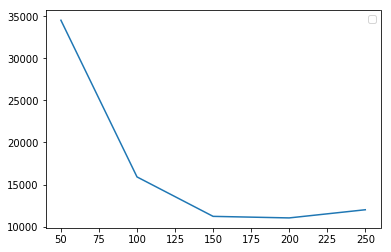

In [163]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    epochlist=[]
    costlist=[]
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            epochlist.append(epoch+1)
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            costlist.append(c)
            if len(epochlist)>2:
                if (costlist[-1]-costlist[-2])>0:
                    print("the cost function increses from  epoch{} to epoch{} ".format(epochlist[-1],epochlist[-2]))
                    break
    
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    #plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(epochlist, costlist)
    #plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

learing rate=0.005   epoch=100  step_size=10
conclusion:the cost function decreases as the number of 
epoches increases till 100.
learing rate=0.005   epoch=500  step_size=10
conclusion:the cost function decreases as the number of 
epoches increases till 500.

cost	15527
epoch	1000		
alpha	0.05

cost 	14532
epoch	1000
alpha	0.005

conclusion:As the number of epoches increases the
cost function decreases .
if the learning rate is low the pocess is slow ,but the cost 
function reaches minimum after some epoches
if the learning rate is high the process is fast,but the 
cost function again start increasing after some epoches.

Own terminating condition:
when cost function has increases for the next set of epoch
then terminate the optimiser function

results:
epoch=200 cost=11023 
epoch=250 cost=11991.9
therefore:the minimum cost is 11023
